CMPU 250 | Class 1 | Intro to NumPy and Pandas

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk

In [164]:
# load cleaned data
df = pd.read_csv("/Users/erin/Downloads/cleaned_dutchess_data.csv")
df_original = df.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   action_taken                       2748 non-null   int64  
 1   derived_race                       2748 non-null   object 
 2   derived_ethnicity                  2748 non-null   object 
 3   applicant_sex                      2748 non-null   int64  
 4   applicant_age                      2748 non-null   object 
 5   income                             2684 non-null   float64
 6   debt_to_income_ratio               2234 non-null   object 
 7   applicant_credit_score_type        2748 non-null   int64  
 8   loan_amount                        2748 non-null   float64
 9   loan_to_value_ratio                2219 non-null   object 
 10  interest_rate                      2068 non-null   object 
 11  rate_spread                        1874 non-null   objec

,action_taken,derived_race,derived_ethnicity,applicant_sex,applicant_age,income,debt_to_income_ratio,applicant_credit_score_type,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,loan_type,loan_purpose,lien_status,property_value,occupancy_type,tract_minority_population_percent,aus-1,denial_reason-1
0,1,Black or African American,Not Hispanic or Latino,2,45-54,104.0,37,1,395000.0,96.5,7.125,1.054,2,1,1,405000,1,21.09,3,10
1,1,White,Not Hispanic or Latino,1,45-54,79.0,50%-60%,2,255000.0,96.5,6.25,0.458,2,1,1,265000,1,63.55,3,10
2,1,White,Hispanic or Latino,1,35-44,133.0,42,3,455000.0,96.999,6.25,0.007,1,1,1,465000,1,26.05,1,10
3,1,White,Joint,1,35-44,101.0,47,3,405000.0,82.425,6.375,-0.132,1,1,1,495000,1,20.03,2,10
4,5,White,Not Hispanic or Latino,2,<25,101.0,NaN,9,275000.0,NaN,NaN,NaN,1,1,1,NaN,1,25.14,6,10


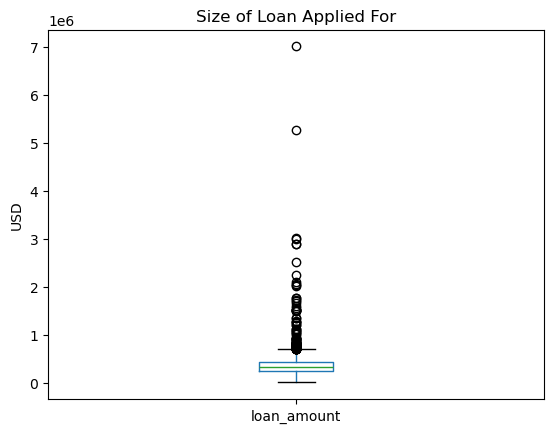

In [126]:
# boxplot for loan amount
df.boxplot('loan_amount', grid=False)

plt.title('Size of Loan Applied For')
plt.ylabel('USD')
plt.show()

There appear to be two extreme outliers in the data, so we will temporarily remove them to better examine the trend.

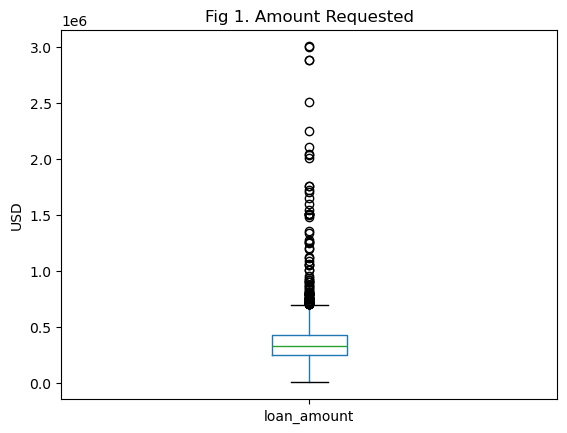

In [128]:
# find outlier values
df.sort_values(by="loan_amount")

# remove largest outliers
df = df[df['loan_amount'] < 4000000]

# re-plot
df.boxplot('loan_amount', grid=False)
plt.title('Fig 1. Amount Requested')
plt.ylabel('USD')
plt.show()

In Figure 1, we can see that the distribution of loan values applied for appears to be symmetrical,
with no skew. This indicates that in Dutchess County in 2023, there were just as many small loans
requested as larger loans. However, there are many outliers on the upper range of the distribution,
which would indicate that a few applicants requested very large sums of money.

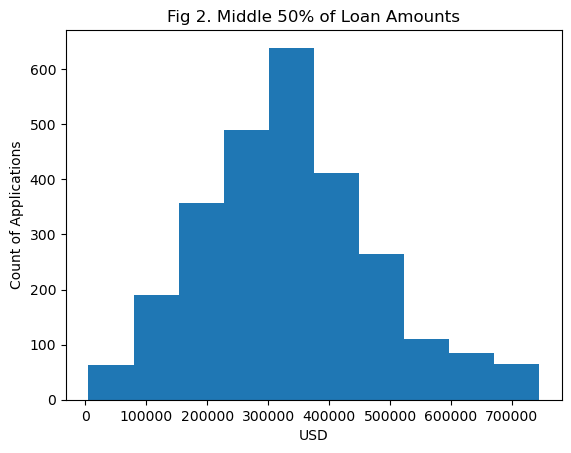

,action_taken,derived_race,derived_ethnicity,applicant_sex,applicant_age,income,debt_to_income_ratio,applicant_credit_score_type,loan_amount,loan_to_value_ratio,...,rate_spread,loan_type,loan_purpose,lien_status,property_value,occupancy_type,tract_minority_population_percent,aus-1,denial_reason-1,binary_race
0,1,Black or African American,Not Hispanic or Latino,2,45-54,104.0,37,1,395000.0,96.5,...,1.054,2,1,1,405000,1,21.09,3,10,0
1,1,White,Not Hispanic or Latino,1,45-54,79.0,50%-60%,2,255000.0,96.5,...,0.458,2,1,1,265000,1,63.55,3,10,1
2,1,White,Hispanic or Latino,1,35-44,133.0,42,3,455000.0,96.999,...,0.007,1,1,1,465000,1,26.05,1,10,1
3,1,White,Joint,1,35-44,101.0,47,3,405000.0,82.425,...,-0.132,1,1,1,495000,1,20.03,2,10,1
4,5,White,Not Hispanic or Latino,2,<25,101.0,NaN,9,275000.0,NaN,...,NaN,1,1,1,NaN,1,25.14,6,10,1
5,1,White,Joint,1,25-34,95.0,50%-60%,1,305000.0,80.0,...,0.43,2,1,1,385000,1,30.71,3,10,1
6,1,White,Not Hispanic or Latino,2,25-34,179.0,38,11,475000.0,85.909,...,-0.989,1,1,1,555000,1,39.18,6,10,1
7,5,White,Ethnicity Not Available,2,55-64,33.0,NaN,9,35000.0,NaN,...,NaN,1,1,1,NaN,1,21.09,6,10,1
8,1,White,Ethnicity Not Available,2,25-34,90.0,20%-<30%,2,115000.0,79.72,...,1.08,1,1,1,145000,1,28.27,6,10,1
9,1,Asian,Not Hispanic or Latino,2,35-44,NaN,NaN,3,195000.0,55.0,...,0.541,1,1,1,355000,3,24.38,6,10,0


In [158]:
# plot a histogram showing the breakdown of loan values beneath the 75th percentile
df_filtered = df[df['loan_amount'] < 750000]
df_filtered.hist('loan_amount', grid=False)
plt.title('Fig 2. Middle 50% of Loan Amounts')
plt.ylabel('Count of Applications')
plt.xlabel('USD')
plt.show()
df.head(20)

In Figure 2, we looked at the interquartile range and used the box values to 
focus on where most of the data lie. Here we can see that once the especially
large loans are removed, there's a normal distribution centered somewhere
around $350,000.

In [166]:
# transform derived race to binary column for white or Black
df['binary_race'] = 0
df.loc[df['derived_race'] == "White", 'binary_race'] = 1

# transform derived ethnicity to binary column for Hispanic or not
df['binary_ethnicity'] = 0
df.loc[df['derived_ethnicity'] == "Not Hispanic or Latino", 'binary_ethnicity'] = 1

# create correlation matrix
df_corr = df[['applicant_sex','binary_race','binary_ethnicity','denial_reason-1']]
df_corr.corr()

,applicant_sex,binary_race,binary_ethnicity,denial_reason-1
applicant_sex,1.000000,-0.060187,-0.017142,-0.002505
binary_race,-0.060187,1.000000,-0.030584,0.043854
binary_ethnicity,-0.017142,-0.030584,1.000000,-0.031868
denial_reason-1,-0.002505,0.043854,-0.031868,1.000000
